In [16]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Veri Okuma

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/electronic_store_sales.csv")

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Veriyi İnceleme

In [5]:
df.shape

(186495, 6)

In [6]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

# Veri Ön İşleme ve Temizleme

## NaN verileri silme

In [7]:
df.dropna(axis=0, how="any", inplace=True)

In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## String verileri Sayıya Dönüştürme

In [9]:
df["Order ID"] = df["Order ID"].astype("int")
df["Quantity Ordered"] = df["Quantity Ordered"].astype("int")

In [10]:
df["Price Each"] = df["Price Each"].astype("float")

## Zaman verisini datetime'a çevirme

In [11]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [14]:
df["Order Date"].head()

0   2019-04-19 08:46:00
2   2019-04-07 22:30:00
3   2019-04-12 14:38:00
4   2019-04-12 14:38:00
5   2019-04-30 09:27:00
Name: Order Date, dtype: datetime64[ns]

# Satış Analizi Soruları

## Satışların en yüksek olduğu ay hangisi? Bu ayda ne kadar para kazanılmış?

### Toplam kazanılan parayı (Sales) hesaplayalım

In [36]:
# Toplam kazanılan para = Ürünün bir adetinin fiyatı x Satılan ürün adeti
df["Sales"] = df["Price Each"] * df["Quantity Ordered"]

In [37]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [38]:
# Satış tarihinden "ay" (month) verisini çıkaralım
df["Month"] = df["Order Date"].dt.month

In [39]:
# Her ay için toplam kazanılan parayı hesaplayalım
monthly_sales = df.groupby("Month").sum()["Sales"]

In [40]:
monthly_sales

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

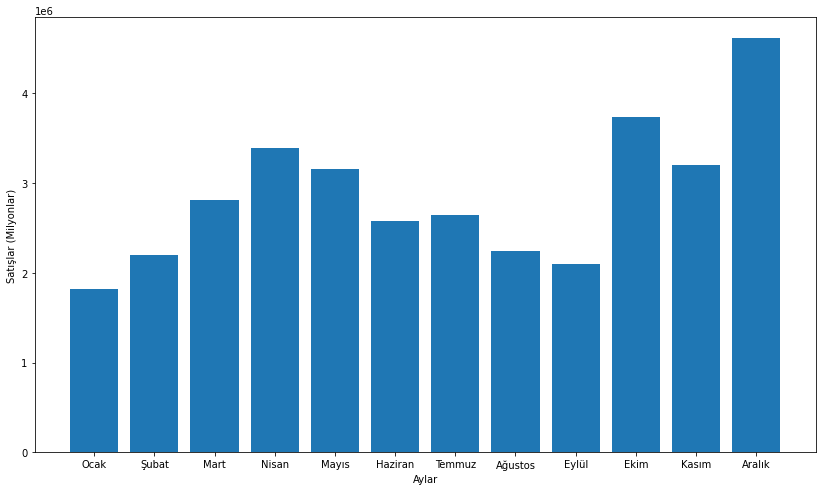

In [46]:
# visualize sales
#months = list(range(1, 13))
months = ["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"]

plt.figure(figsize=(14, 8))
plt.bar(months, monthly_sales.values)
plt.xticks(months)
plt.xlabel("Aylar")
plt.ylabel("Satışlar (Milyonlar)")
plt.show()

In [54]:
best_month = monthly_sales.idxmax()
earned = monthly_sales[best_month]
print(f"En çok satış yapılan ay: \t\t{best_month} {months[best_month-1]}")
print(f"Bu ayda kazanılan para miktarı: \t{earned:.2f}")

En çok satış yapılan ay: 		12 Aralık
Bu ayda kazanılan para miktarı: 	4613443.34


## Hangi şehir en çok miktarda parayı kazanmış?

In [55]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


In [56]:
# Şehir bilgisini alalım
cities = df["Purchase Address"].apply(lambda x: x.split(",")[1])
states = df["Purchase Address"].apply(lambda x: x.split(",")[2].split()[0])
df["City"] = cities + " " + states

In [57]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA


In [58]:
# Her şehrin değerlerinin toplamını alalım
city_sum = df.groupby("City").sum()

In [59]:
city_sum

,Order ID,Quantity Ordered,Price Each,Sales,Month
City,,,,,
Atlanta GA,3.423838e+09,16602.0,2.779908e+06,2.795499e+06,104794
Austin TX,2.280982e+09,11153.0,1.809874e+06,1.819582e+06,69829
Boston MA,4.598265e+09,22528.0,3.637410e+06,3.661642e+06,141112
Dallas TX,3.415644e+09,16730.0,2.752628e+06,2.767975e+06,104620
Los Angeles CA,6.811085e+09,33289.0,5.421435e+06,5.452571e+06,208325
New York City NY,5.736334e+09,27932.0,4.635371e+06,4.664317e+06,175741
Portland ME,5.632663e+08,2750.0,4.471893e+05,4.497583e+05,17144
Portland OR,2.305595e+09,11303.0,1.860558e+06,1.870732e+06,70621
San Francisco CA,1.030444e+10,50239.0,8.211462e+06,8.262204e+06,315520


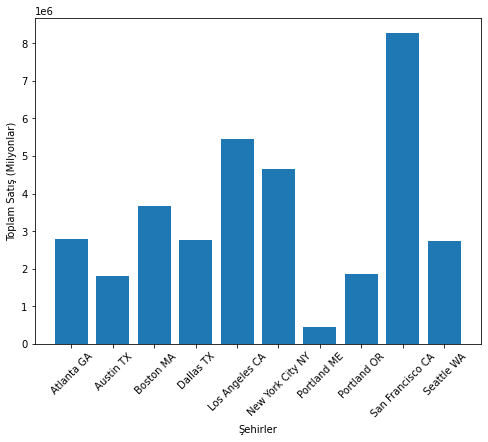

In [60]:
# veriyi örselleştir
cities = city_sum.index.values

plt.figure(figsize=(8, 6))
plt.bar(cities, city_sum["Sales"].values)
plt.xticks(cities, rotation=45)
plt.xlabel("Şehirler")
plt.ylabel("Toplam Satış (Milyonlar)")
plt.show()

In [62]:
best_city = city_sum["Sales"].idxmax()
sales = city_sum["Sales"].loc[best_city]
print(f"En çok miktarda para kazanan şehir: \t{best_city}")
print(f"Kazandığı para miktarı: \t\t${round(sales, 2)}")

En çok miktarda para kazanan şehir: 	 San Francisco CA
Kazandığı para miktarı: 		$8262203.91


## Müşterilerin ürün satın alma ihtimalini artırmak için günün hangi saatinde reklamlar gösterilmeli?

In [63]:
# her şehir için satılan ürün miktarını hesaplayalım
df["Hour"] = df["Order Date"].dt.hour

hourly_count = df.groupby("Hour")["Quantity Ordered"].count()

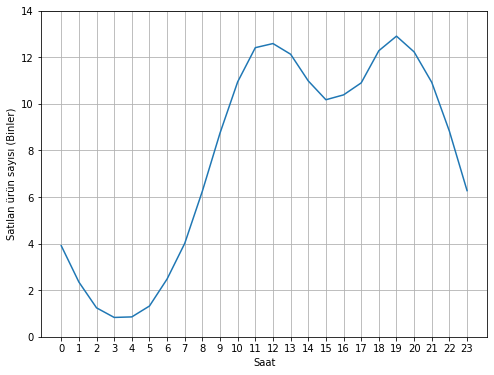

In [65]:
# visualize hourly count
hours = hourly_count.index.values

plt.figure(figsize=(8, 6))
plt.plot(hours, hourly_count.values)
plt.xticks(hours)
plt.xlabel("Saat")
labels, locs = plt.yticks()
plt.yticks(labels, (labels / 1000).astype(int))
plt.ylabel("Satılan ürün sayısı (Binler)")
plt.grid()
plt.show()

In [66]:
"""
Veride 2 tane zirve noktası var.
Öğlen 12 ve akşam 7 (19.00).
Bu saatlerden önce reklamları artırırsak satılan ürün sayısını artırabiliriz.
""";

## Hangi ürünler birlikte en çok satılmış?

In [67]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,9


In [69]:
# birlikte sipariş edilen ürünlerin olduğu satırları alalım
new_df = df[df["Order ID"].duplicated(keep=False)].copy()
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,Los Angeles CA,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Boston MA,11


In [72]:
# satış ID'leri ile gruplayalım, ürünleri birleştirelim
new_df["Sold Together"] = new_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

In [73]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Sold Together
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Boston MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [74]:
# tekrarlayan ID'ler olan satırları silelim, çünkü birlikte satılan ürünler dataframe'de 2 kere geçiyor artık
new_df = new_df.drop_duplicates(["Order ID"])

In [75]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Sold Together
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Boston MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",5.98,4,San Francisco CA,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",14.95,4,New York City NY,11,"Lightning Charging Cable,USB-C Charging Cable"


In [76]:
# import counter libraries
from itertools import combinations
from collections import Counter

In [78]:
# birlikte satılan ürünleri sayalım
count = Counter()

for row in new_df["Sold Together"]:
    products = row.split(",")
    # ürünlerin ikili kombinasyonlarını sayaca ekleyelim
    count.update(Counter(combinations(products, 2)))

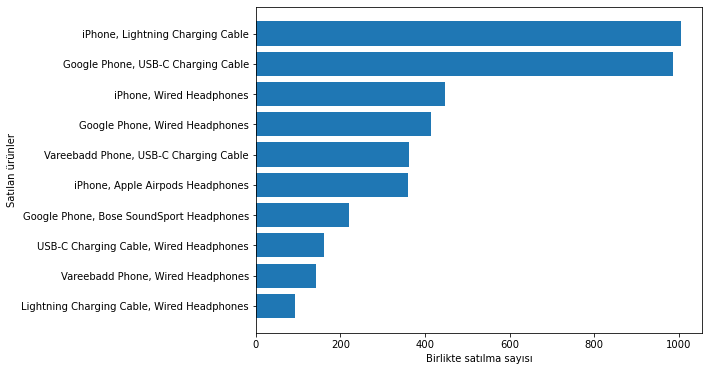

In [90]:
# en çok satan 10 ürünü görselleştirelim
top_10 = count.most_common(10)

top_10_products = [", ".join(i[0]) for i in top_10]
top_10_counts = [i[1] for i in top_10]

plt.figure(figsize=(8, 6))
plt.barh(y=top_10_products[::-1], width=top_10_counts[::-1])
plt.xlabel("Birlikte satılma sayısı")
plt.ylabel("Satılan ürünler")
plt.show()

In [89]:
# show top products
top_10 = count.most_common(10)

for i in top_10:
    products = i[0]
    num = i[1]
    print(f"{products[0]}, {products[1]}:".ljust(50), num)

iPhone, Lightning Charging Cable:                  1005
Google Phone, USB-C Charging Cable:                987
iPhone, Wired Headphones:                          447
Google Phone, Wired Headphones:                    414
Vareebadd Phone, USB-C Charging Cable:             361
iPhone, Apple Airpods Headphones:                  360
Google Phone, Bose SoundSport Headphones:          220
USB-C Charging Cable, Wired Headphones:            160
Vareebadd Phone, Wired Headphones:                 143
Lightning Charging Cable, Wired Headphones:        92


## Hangi ürün en çok satıldı? Neden?

In [92]:
# Ürün isimleri ile gruplayalım ve her ürünün satılan adetini toplayalım
product_count = df.groupby("Product")["Quantity Ordered"].sum()

In [93]:
product_count.sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

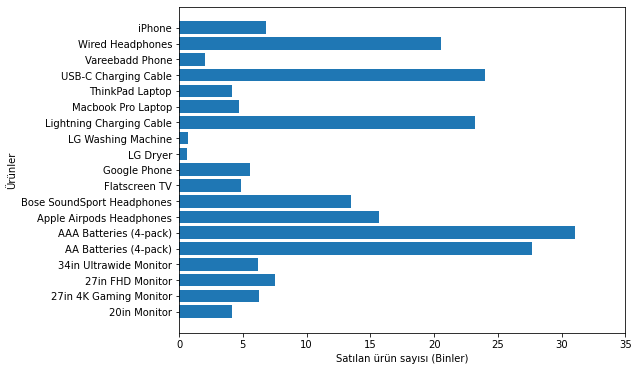

In [95]:
# visualize product order counts
products = product_count.index.values

plt.figure(figsize=(8, 6))
plt.barh(products, product_count.values)
plt.ylabel("Ürünler")
ticks, locations = plt.xticks()
plt.xticks(ticks, (ticks / 1000).astype(int))
plt.xlabel("Satılan ürün sayısı (Binler)")
plt.show()

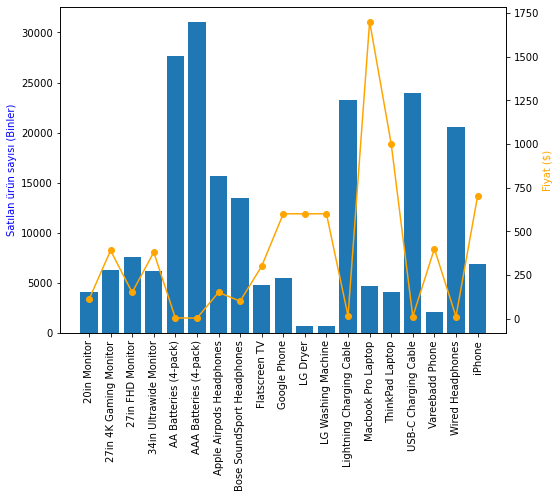

In [96]:
# Ürünlerin satış miktarı ile fiyatlarında bir ilişki var mı bakalım
product_count = df.groupby("Product")["Quantity Ordered"].sum()
prices = df.groupby("Product")["Price Each"].mean()

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()
# order counts
ax1.bar(products, product_count.values)
ax1.set_xticklabels(products, rotation=90)
plt.xlabel("Ürünler")
ax1.set_ylabel("Satılan ürün sayısı (Binler)", color="blue")
# prices
ax2.plot(products, prices.values, color="orange", marker="o")
ax2.set_ylabel("Fiyat ($)", color="orange")
plt.show()

## Hangi ürün en çok para kazandırmış?

In [98]:
# her ürün için kazanılan parayı hesaplayalım
product_sales = df.groupby("Product")["Sales"].sum()
product_sales.head()

Product
20in Monitor               454148.71
27in 4K Gaming Monitor    2435097.56
27in FHD Monitor          1132424.50
34in Ultrawide Monitor    2355558.01
AA Batteries (4-pack)      106118.40
Name: Sales, dtype: float64

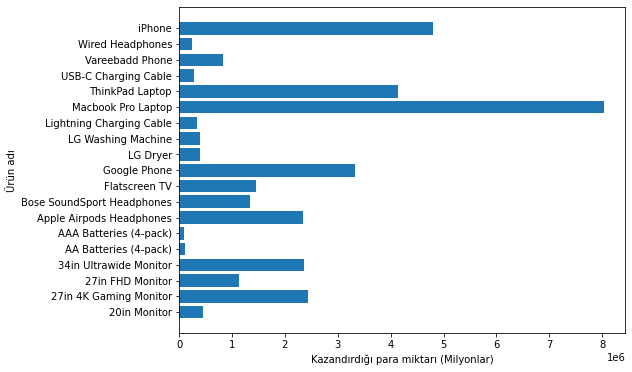

In [100]:
# her ürünün kazandırdığı parayı görselleştirelim
plt.figure(figsize=(8, 6))
plt.barh(product_sales.index, product_sales.values)
plt.xlabel("Kazandırdığı para miktarı (Milyonlar)")
plt.ylabel("Ürün adı")
plt.show()